In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# importando os dados

In [3]:
data = np.genfromtxt('datasets/unlabeled_data.txt')
data

array([[ 0.65584144,  0.57869459],
       [ 0.87323599,  1.01929942],
       [ 0.84497595,  0.96387815],
       [ 0.94733539,  1.12007555],
       [ 0.75903867,  0.85381287],
       [ 0.77515038,  0.62283528],
       [ 0.89980941,  0.98313019],
       [ 0.76897417,  0.94410094],
       [ 0.56565486,  0.49582744],
       [ 0.55133041,  0.51032044],
       [ 0.99732821,  0.8073719 ],
       [ 0.59916338,  0.82477202],
       [ 1.17924092,  1.09377092],
       [ 0.95853403,  1.10479304],
       [ 0.84113442,  1.01133493],
       [ 1.1563945 ,  1.0873606 ],
       [ 1.11375423,  1.1106412 ],
       [ 0.78327666,  0.79839022],
       [ 0.92606231,  0.65856259],
       [ 1.04661125,  0.94631668],
       [ 1.00449143, -0.76488745],
       [ 0.87946258, -0.72266732],
       [ 0.52114525, -0.67799821],
       [ 0.8971303 , -0.84400689],
       [ 0.88885612, -0.89868288],
       [ 0.49383252, -0.73051307],
       [ 0.46392026, -0.58102834],
       [ 0.93538383, -0.68531091],
       [ 0.49767799,

In [4]:
data.shape

(420, 2)

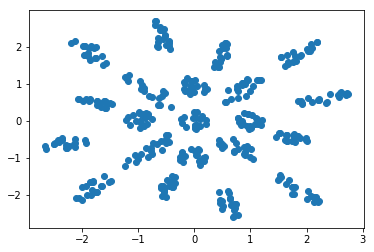

In [5]:
#plt.scatter(data.iloc[:, 0].values, data.iloc[:,1].values)
plt.scatter(data[:, 0], data[:,1])
plt.show()

In [6]:
# Utilizando o método Elbow para encontrar o valor ideal do parâmetro k
# Podemos ver que a partir do número de 8 clusters não temos uma diminuição tão expressiva

In [7]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(data)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)  

1 1456.11116843
2 945.93158722
3 601.811501134
4 433.39211795
5 351.177779933
6 287.32863439
7 230.014374658
8 186.485742547
9 157.896658014
10 141.78515898


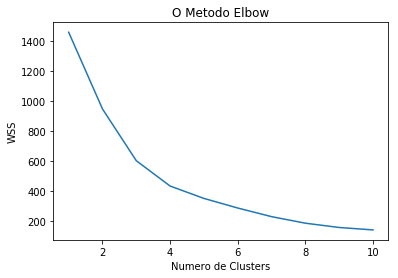

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Os coeficientes de silhueta (Silhouette coefficients) perto de +1 indicam que a amostra está longe dos clusters vizinhos. Um valor de 0 indica que a amostra está ligada ou muito próxima do limite de decisão entre dois clusters vizinhos e os valores negativos indicam que essas amostras podem ter sido atribuídas ao cluster errado.

In [9]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.322582286268
For n_clusters = 3 The average silhouette_score is : 0.363141377113
For n_clusters = 4 The average silhouette_score is : 0.366631070253
For n_clusters = 5 The average silhouette_score is : 0.386832846268
For n_clusters = 6 The average silhouette_score is : 0.371182025033
For n_clusters = 7 The average silhouette_score is : 0.414965025044
For n_clusters = 8 The average silhouette_score is : 0.448378984481
For n_clusters = 9 The average silhouette_score is : 0.452604202344
For n_clusters = 10 The average silhouette_score is : 0.473131537768


In [10]:
# Inicializando o K-means utilizando 8 clusters 
# e o método de inicialização random que irá selecionar os centroides de forma aleatória.

In [11]:
kmeans = KMeans(n_clusters = 8, init = 'random')

In [12]:
# Executando o método fit() para agrupar os dados

In [13]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# Verificando os centroides gerados

In [15]:
kmeans.cluster_centers_

array([[-2.03469621, -1.21923782],
       [ 0.42750298,  1.16155264],
       [ 2.09137412,  1.19940323],
       [-1.21074099,  2.06346647],
       [ 1.23931208, -2.06587929],
       [ 0.94741807, -0.34206935],
       [-1.12289534,  0.43077415],
       [-0.40393474, -1.15341541]])

In [16]:
# Tabela de distâncias
# Cada instância contém três valores, e cada valor corresponde exatamente a distância 
# entre a instância de dados corrente e cada um dos três clusters

In [17]:
distance = kmeans.fit_transform(data)
distance

array([[ 1.60791287,  1.08334432,  2.70817448, ...,  1.02469804,
         1.25227948,  2.06944534],
       [ 1.36027698,  1.43275906,  3.10682143, ...,  1.38227184,
         0.91154766,  2.55948198],
       [ 1.38370787,  1.38427606,  3.05531196, ...,  1.33179904,
         0.94806091,  2.4973568 ],
       ..., 
       [ 4.61752426,  1.92652239,  0.77593663, ...,  3.42340333,
         3.25186764,  2.5852509 ],
       [ 4.79015869,  2.10185705,  0.96983189, ...,  3.62335239,
         3.36905508,  2.79326818],
       [ 4.38686502,  1.70071321,  0.51147303, ...,  3.14615764,
         3.11582863,  2.28711807]])

In [18]:
# labels para cada instância, ou seja, o código do cluster que a instância de dados foi atribuído

In [19]:
labels = kmeans.labels_
labels

array([5, 6, 6, 6, 6, 1, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7,
       7, 3, 7, 7, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 5, 4, 4, 5, 4, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0,

In [20]:
# Representação gráfica dos dados e centróides

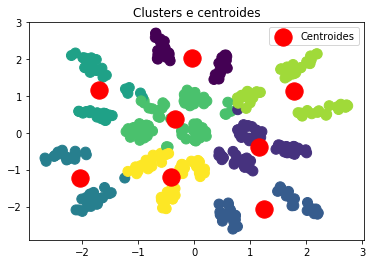

In [21]:
plt.scatter(data[:, 0], data[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroides')
plt.title('Clusters e centroides')

plt.legend()
 
plt.show()
